In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [3]:
# Define the number of augmented samples to create for each original sample
# Increase dataset from 100 rows to 500

num_augmented_samples = 3

augmented_data = []

for index, row in data.iterrows():
    original_sample = row.to_dict()
    augmented_samples = []

    for _ in range(num_augmented_samples):
        augmented_sample = original_sample.copy()
        augmented_sample['Temparature'] += np.random.normal(0, 0.1)
        augmented_sample['Humidity'] += np.random.normal(0, 0.1)
        augmented_sample['Moisture'] += np.random.normal(0, 0.1)
        augmented_sample['Nitrogen'] += np.random.normal(0, 0.1)
        augmented_sample['Potassium'] += np.random.normal(0, 0.1)
        augmented_sample['Phosphorous'] += np.random.normal(0, 0.1)
        # Add more transformations for other columns as needed
        augmented_samples.append(augmented_sample)

    augmented_data.extend(augmented_samples)

# Convert the augmented data to a DataFrame
augmented_dataset = pd.DataFrame(augmented_data)

# Concatenate the original dataset 
data = pd.concat([data, augmented_dataset], ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temparature  2208 non-null   float64
 1   Humidity     2208 non-null   float64
 2   Moisture     2208 non-null   float64
 3   Soil_Type    2208 non-null   object 
 4   Crop_Type    2208 non-null   object 
 5   Nitrogen     2208 non-null   float64
 6   Potassium    2208 non-null   float64
 7   Phosphorous  2208 non-null   float64
 8   Fertilizer   2208 non-null   object 
dtypes: float64(6), object(3)
memory usage: 155.4+ KB


In [5]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [6]:
#checking unique values
data.nunique()

Temparature    1677
Humidity       1690
Moisture       1697
Soil_Type         5
Crop_Type        17
Nitrogen       1703
Potassium      1687
Phosphorous    1692
Fertilizer       14
dtype: int64

In [7]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [8]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [9]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [10]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,2208.000000,2208.000000,2208.000000,2208,2208,2208.000000,2208.000000,2208.000000,2208
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,768,256,NaN,NaN,NaN,432
mean,28.631779,64.555926,42.841829,NaN,NaN,28.521549,10.144601,21.116891,NaN
std,5.084905,11.874453,11.501080,NaN,NaN,29.105429,13.448455,14.911739,NaN
min,-0.175695,49.782835,24.792559,NaN,NaN,-0.157743,-0.381867,-0.311129,NaN
25%,26.000000,54.100217,33.033989,NaN,NaN,10.119102,0.000000,8.000636,NaN
50%,28.948422,61.926530,41.021078,NaN,NaN,15.051770,0.171078,20.061059,NaN
75%,31.867609,68.131537,50.914483,NaN,NaN,36.953741,17.947765,35.922478,NaN


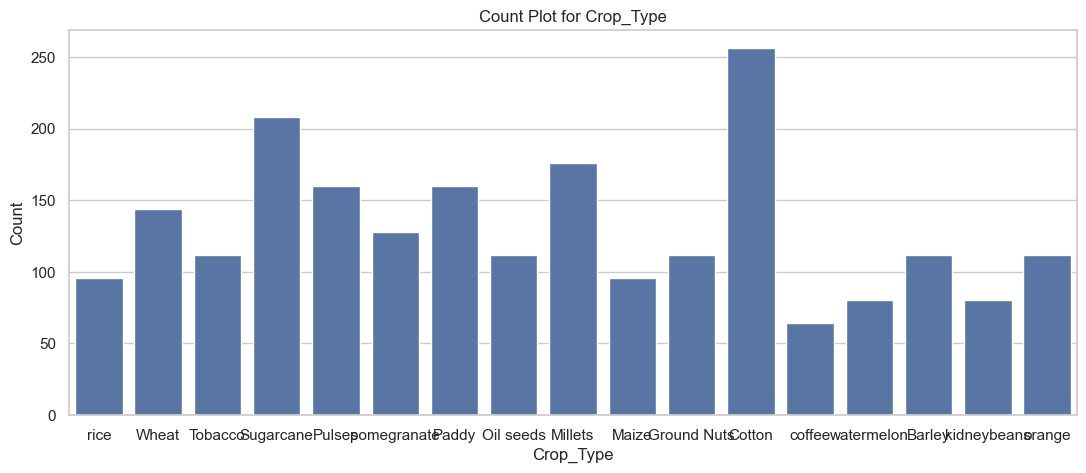

In [11]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

In [12]:
#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset

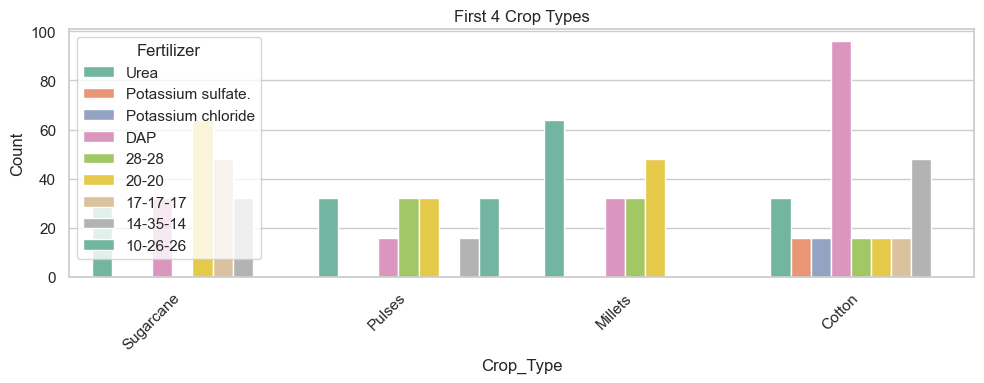

In [13]:

#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


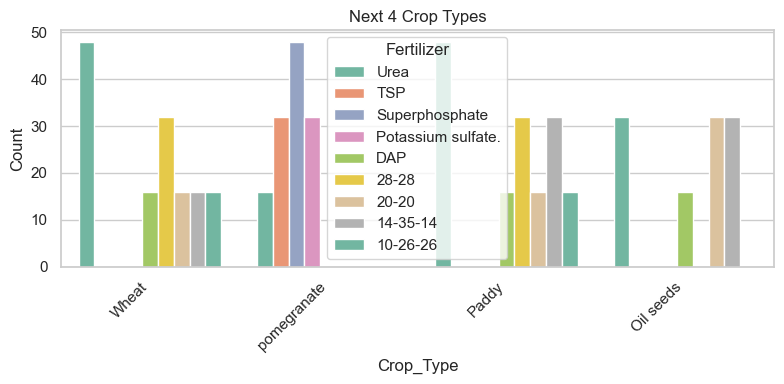

In [14]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


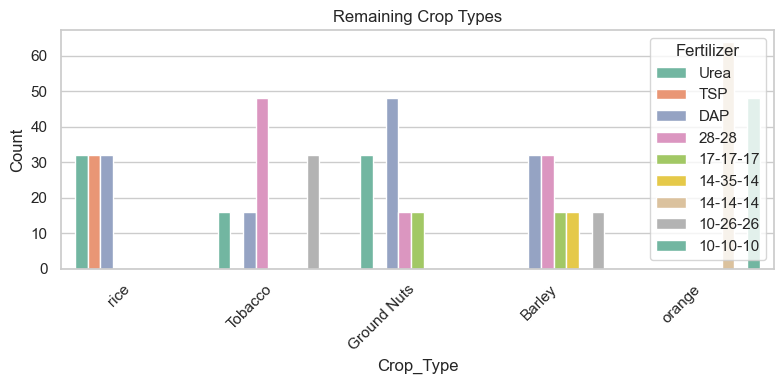

In [15]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


In [16]:
#  this plot is provides insights into how different crop types are distributed based on the type of fertilizer used.
# The x-axis represents the different crop types.
# The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

In [17]:
#Heatmap for Correlation Analysis
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'Clayey'

In [ ]:
#here is no such correlation between any of variables.. 

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


In [ ]:
# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int32
 4   Crop_Type    441 non-null    int32
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 27.6 KB


In [ ]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

### Logistic regression model

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

predicted_values = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')

predicted_values = ds.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

print("DecisionTrees's Accuracy is: ", x*100, y*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  90.09009009009009 93.42403628117914


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = NaiveBayes.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9459459459459459 0.9138321995464853


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)

predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = SVM.predict(X_train_norm)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('SVM')
print("SVM's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.990990990990991 0.9931972789115646


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = LogReg.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.7837837837837838 0.909297052154195


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = RF.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('RF')
print("RF's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  1.0 1.0


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

Cross-validation score of RF is: [1. 1. 1. 1. 1.]
Cross-validation score of LogReg is: [0.97297297 0.94594595 0.91818182 0.88181818 0.87272727]
Cross-validation score of SVM is: [0.96396396 0.92792793 0.91818182 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]
Cross-validation score of ds is: [1. 1. 1. 1. 1.]


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

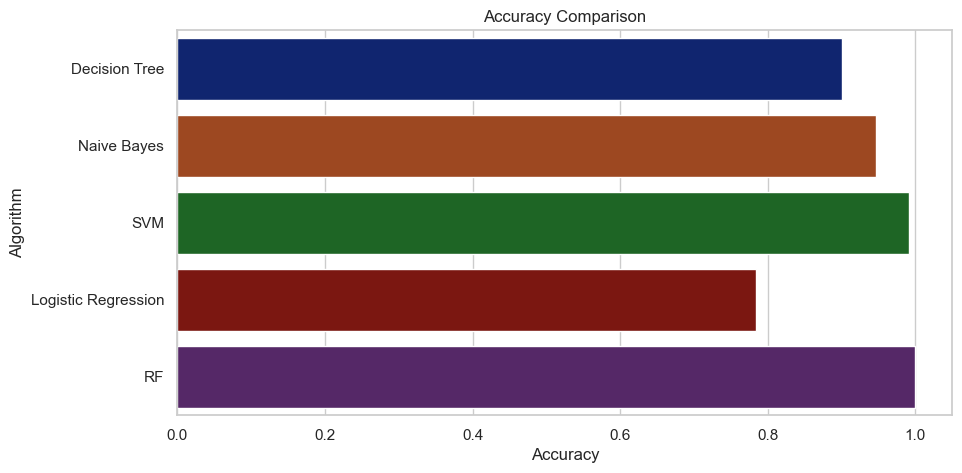

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(RF,pickle_out)
pickle_out.close()

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

array([6])

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[25,78,43,4,1,22,26,38]])

array([10])

In [ ]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [ ]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[1]

'10-26-26'